In [1]:
# 모델 구현 시간 체크
import time
# 시작시간 체크
start = time.time()

# 패키지 로딩
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

# 수입 데이터 로딩 (가상데이터)
df_org = pd.read_csv('train.csv')
#쓸모없는 열 삭제
del df_org['Unnamed: 0']

### Nan 값, 데이터셋  처리 

In [2]:
df = df_org.fillna('ㅁ')
del df['검사결과코드']
del df['핵심적발']
del df['신고번호']
del df['신고일자']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   통관지세관부호   76837 non-null  int64  
 1   신고인부호     76837 non-null  object 
 2   수입자부호     76837 non-null  object 
 3   해외거래처부호   76837 non-null  object 
 4   특송업체부호    76837 non-null  object 
 5   수입통관계획코드  76837 non-null  object 
 6   수입신고구분코드  76837 non-null  object 
 7   수입거래구분코드  76837 non-null  int64  
 8   수입종류코드    76837 non-null  int64  
 9   징수형태코드    76837 non-null  int64  
 10  신고중량(KG)  76837 non-null  float64
 11  과세가격원화금액  76837 non-null  float64
 12  운송수단유형코드  76837 non-null  int64  
 13  반입보세구역부호  76837 non-null  int64  
 14  HS10단위부호  76837 non-null  int64  
 15  적출국가코드    76837 non-null  object 
 16  원산지국가코드   76837 non-null  object 
 17  관세율구분코드   76837 non-null  object 
 18  관세율       76837 non-null  float64
 19  우범여부      76837 non-null  int64  
dtypes: float64(3), int64(8), obj

In [3]:
discrete_columns = ['통관지세관부호',
       '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드','수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', 
       '원산지국가코드', '관세율구분코드']

for var in discrete_columns:
    df[var] = df[var].astype(str)

In [4]:
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

for var in ['신고중량(KG)', '과세가격원화금액']:
    df[var] = df[var].apply(lambda x: np.log1p(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   통관지세관부호   76837 non-null  object 
 1   신고인부호     76837 non-null  object 
 2   수입자부호     76837 non-null  object 
 3   해외거래처부호   76837 non-null  object 
 4   특송업체부호    76837 non-null  object 
 5   수입통관계획코드  76837 non-null  object 
 6   수입신고구분코드  76837 non-null  object 
 7   수입거래구분코드  76837 non-null  object 
 8   수입종류코드    76837 non-null  object 
 9   징수형태코드    76837 non-null  object 
 10  신고중량(KG)  76837 non-null  float64
 11  과세가격원화금액  76837 non-null  float64
 12  운송수단유형코드  76837 non-null  object 
 13  반입보세구역부호  76837 non-null  object 
 14  HS10단위부호  76837 non-null  object 
 15  적출국가코드    76837 non-null  object 
 16  원산지국가코드   76837 non-null  object 
 17  관세율구분코드   76837 non-null  object 
 18  관세율       76837 non-null  float64
 19  우범여부      76837 non-null  int64  
dtypes: float64(3), int64(1), obj

In [6]:
label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df[var].unique())}
    print(label_encoding_ref[var])
    df[var] = [label_encoding_ref[var][x] for x in df[var]]

{'121': 1, '30': 2, '20': 3, '40': 4, '10': 5, '150': 6, '140': 7, '33': 8, '80': 9, '60': 10, '16': 11, '152': 12, '41': 13, '13': 14, '82': 15, '120': 16, '21': 17, '151': 18, '153': 19, '62': 20, '122': 21, '12': 22, '50': 23, '39': 24, '131': 25, '90': 26, '81': 27, '53': 28, '102': 29, '56': 30, '17': 31, '23': 32, '130': 33, '100': 34, '101': 35, '70': 36, '14': 37, '71': 38, '154': 39, '110': 40}
{'2O5A2': 1, '305K5': 2, 'CGMT6': 3, 'QWUTG': 4, '0X1CO': 5, 'QV6WA': 6, 'BTMNQ': 7, '9TJBD': 8, 'ZAV8X': 9, 'RDDA3': 10, 'WN68Z': 11, 'LDZ42': 12, 'JCOIV': 13, '7Z767': 14, '90DJS': 15, 'HOSTX': 16, 'D2LHR': 17, 'J9SYX': 18, 'D3UN5': 19, 'QUP4L': 20, 'ZWWQR': 21, 'Z5KQD': 22, 'XNLY5': 23, 'QPV57': 24, 'ZYM25': 25, 'FQSF7': 26, '9J612': 27, 'YBA4D': 28, 'WTDS3': 29, 'ZEWOY': 30, 'JMTO5': 31, 'N8ZDA': 32, '3A8I7': 33, '48BVY': 34, 'QWXA9': 35, 'EX3CM': 36, 'CAG89': 37, 'GXAPH': 38, 'YNURP': 39, 'FLZF8': 40, 'MFVGQ': 41, '7TNHP': 42, 'WX0PH': 43, 'ZIWZ5': 44, 'VXXBS': 45, 'WGUGM': 46, 'M7

{'D': 1, 'C': 2, 'B': 3, 'E': 4, 'F': 5, 'H': 6, 'Z': 7}
{'B': 1, 'D': 2, 'A': 3, 'E': 4}
{'15': 1, '11': 2, '94': 3, '87': 4, '91': 5, '88': 6, '89': 7, '22': 8, '84': 9, '96': 10, '55': 11, '83': 12, '92': 13, '29': 14, '52': 15, '71': 16, '21': 17, '93': 18, '85': 19, '59': 20, '51': 21, '86': 22, '80': 23, '13': 24, '12': 25}
{'23': 1, '21': 2, '14': 3, '11': 4, '26': 5, '15': 6, '28': 7, '12': 8, '13': 9, '27': 10}
{'43': 1, '11': 2, '18': 3, '14': 4, '0': 5, '21': 6, '33': 7, '13': 8, '12': 9}
{'10': 1, '40': 2, '50': 3, '30': 4, '90': 5, '20': 6}
{'2106003': 1, '4077010': 2, '4077007': 3, '4077106': 4, '2006075': 5, '3077102': 6, '2002079': 7, '4077101': 8, '4077008': 9, '3078004': 10, '2010019': 11, '4077135': 12, '2012014': 13, '1602003': 14, '1606020': 15, '1011065': 16, '4002001': 17, '3078030': 18, '3077016': 19, '2012016': 20, '2086001': 21, '3311025': 22, '1206028': 23, '2006003': 24, '3078022': 25, '4077132': 26, '3077011': 27, '4077009': 28, '4077004': 29, '1011209': 30

{'8481900000': 1, '2106909099': 2, '6307909000': 3, '6505009090': 4, '6204320000': 5, '9506910000': 6, '3915909000': 7, '5515119000': 8, '8504403010': 9, '2941909099': 10, '7117900000': 11, '3304999000': 12, '6806209000': 13, '8536490000': 14, '3926109000': 15, '9027200000': 16, '7117199000': 17, '8205709000': 18, '8483909000': 19, '8205101000': 20, '7326909000': 21, '2939809000': 22, '1902301090': 23, '9503003990': 24, '6802930000': 25, '3926909000': 26, '7410211000': 27, '8607290000': 28, '9403900000': 29, '902300000': 30, '4202999000': 31, '6810999000': 32, '6815990000': 33, '1602909000': 34, '3404901090': 35, '8211930000': 36, '9026802000': 37, '9031809099': 38, '8703241020': 39, '9503003411': 40, '4202399000': 41, '4201009090': 42, '6203421000': 43, '9506290000': 44, '8543709090': 45, '3924909000': 46, '703101000': 47, '6110909000': 48, '6309000000': 49, '6211499000': 50, '3003909900': 51, '301929090': 52, '9506310000': 53, '8714109000': 54, '7404000000': 55, '4202922000': 56, '62

In [7]:
df.shape

(76837, 20)

In [8]:
a = [2,5,11]
for i in a : 
    df.loc[df['통관지세관부호'] == i , '통관지세관부호'] = 99
    
a = [12,3,18,1,14,4,7,36,46,43]
for i in a : 
    df.loc[df['특송업체부호'] == i , '특송업체부호'] = 99
    
a = [3,4]
for i in a : 
    df.loc[df['수입통관계획코드'] == i , '수입통관계획코드'] = 99
    
a = [2,4]
for i in a : 
    df.loc[df['수입신고구분코드'] == i , '수입신고구분코드'] = 99
    
a = [3,4,5]
for i in a : 
    df.loc[df['수입거래구분코드'] == i , '수입거래구분코드'] = 99
    
a = [5,7,8,6,1,3,9,10]
for i in a : 
    df.loc[df['수입종류코드'] == i , '수입종류코드'] = 99

a = [4,5]
for i in a : 
    df.loc[df['징수형태코드'] == i , '징수형태코드'] = 99
a = [1,3]
for i in a : 
    df.loc[df['징수형태코드'] == i , '징수형태코드'] = 98

a = [1,2]
for i in a : 
    df.loc[df['운송수단유형코드'] == i , '운송수단유형코드'] = 99
    
a = [3,4]
for i in a : 
    df.loc[df['운송수단유형코드'] == i , '운송수단유형코드'] = 98
    


### smote 적용

In [9]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]

x_train.shape, y_train.shape

((76837, 19), (76837,))

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11)
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)
x_train_sm

,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
0,1,1,1,1,99,1,1,1,99,98,4.844187,8.593963,99,1,1,1,1,1,8.000000
1,99,2,2,1,2,2,1,2,2,2,10.303820,13.258812,99,2,2,1,1,1,8.000000
2,3,3,3,2,2,1,1,2,2,98,10.067242,10.862759,99,3,3,1,1,1,10.000000
3,4,4,4,1,2,2,1,99,2,98,9.429564,14.388527,99,4,4,2,2,1,8.000000
4,99,5,5,3,2,2,1,2,2,98,9.661015,15.987683,99,5,5,2,2,2,5.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118525,81,413,3840,1,20,2,1,1,2,80,8.262836,16.598349,99,55,1035,5,4,3,6.539214
118526,4,419,264,3699,26,2,1,78,2,98,9.468215,15.866406,99,161,1500,1,1,4,2.010470
118527,64,336,2951,1190,2,36,1,2,2,98,8.630762,14.676057,99,49,743,2,2,2,4.173926
118528,4,104,3526,3835,99,31,1,1,2,98,7.143604,13.484891,98,58,1524,2,2,1,5.747396


In [11]:
df_org = pd.concat([x_train_sm, y_train_sm],axis=1,sort=False)

## 데이터 분할

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

In [19]:
# 날짜 순에 따라 90:10 으로 훈련 및 테스트 데이터 분리
df_org_train, df_org_test, org_train_y, org_test_y = train_test_split(x_train_sm, y_train_sm, test_size = 0.3, random_state =3)

In [20]:
# 데이터 사이즈 확인
print(df_org_train.shape, df_org_test.shape)

(82971, 19) (35559, 19)


In [21]:
# 훈련데이터 샘플 확인
df_org_train.head(1)

,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
58988,4,58,400,1763,2,5,1,2,4,2,8.966816,14.464074,99,17,255,2,2,1,8.0


In [22]:
# 모델예측 대상인 우범여부 변수 분리
org_train_y = df_org_train.pop('우범여부')
org_test_y = df_org_test.pop('우범여부')

KeyError: '우범여부'

In [23]:
# 훈련데이터와 테스트데이터에서 우범건수 비교
from collections import Counter
cnt_train = Counter(org_train_y)
cnt_test = Counter(org_test_y)

print(f"훈련  데이터 비우범건수: {cnt_train[0]}, 훈련  데이터 우범건수: {cnt_train[1]}")
print(f"테스트데이터 비우범건수: {cnt_test[0]}, 테스트데이터 우범건수: {cnt_test[1]}")

훈련  데이터 비우범건수: 41427, 훈련  데이터 우범건수: 41544
테스트데이터 비우범건수: 17838, 테스트데이터 우범건수: 17721


In [17]:
# XGBoost 모델 생성
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [18]:
# 모델 활성화 및 설정
xgb_clf = XGBClassifier(n_estimators=10, max_depth=4,n_jobs=-1) #
# 모델 훈련 시 성능평가 데이터 설정 (별도의 성능평가 데이터를 구성할 수도 있으나, 여기서는 그냥 테스트데이터를 사용)
eval_set = [(df_org_train, org_train_y), (df_org_test, org_test_y)]
# 모델 훈련 (training/fitting)
xgb_clf.fit(df_org_train, org_train_y, eval_metric=["logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.58690	validation_1-logloss:0.56046
[1]	validation_0-logloss:0.52958	validation_1-logloss:0.48608
[2]	validation_0-logloss:0.49204	validation_1-logloss:0.43145
[3]	validation_0-logloss:0.46597	validation_1-logloss:0.38966
[4]	validation_0-logloss:0.44712	validation_1-logloss:0.36056
[5]	validation_0-logloss:0.43529	validation_1-logloss:0.34219
[6]	validation_0-logloss:0.41522	validation_1-logloss:0.30224
[7]	validation_0-logloss:0.40487	validation_1-logloss:0.28294
[8]	validation_0-logloss:0.39570	validation_1-logloss:0.26361
[9]	validation_0-logloss:0.38828	validation_1-logloss:0.24861


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

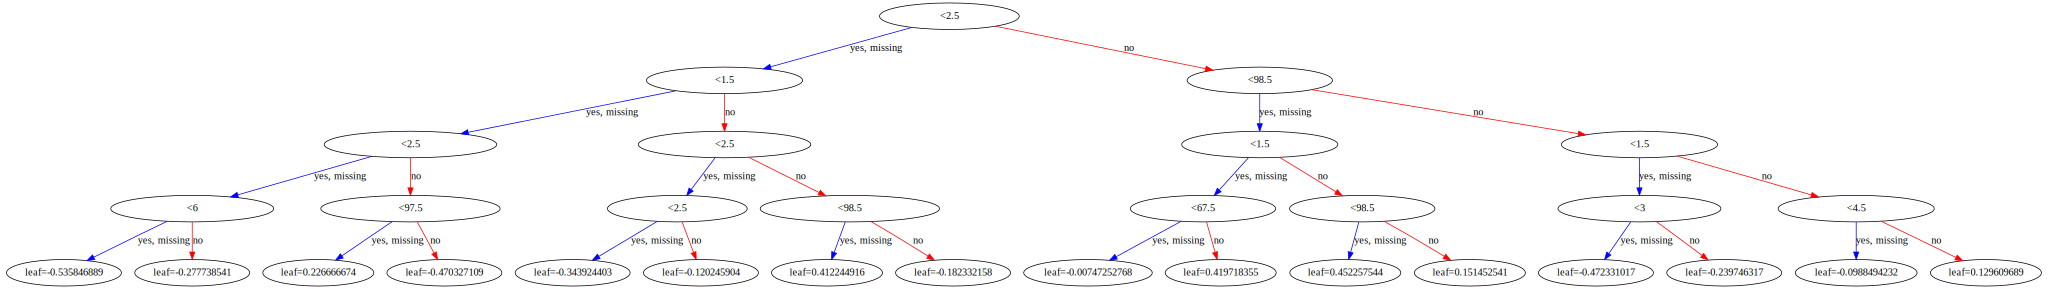

In [19]:
from keras.utils.vis_utils import plot_model
# 의사결정 트리 중 첫번째 트리 시각화
import xgboost as xgb
xgb.to_graphviz(booster = xgb_clf, num_trees=0)

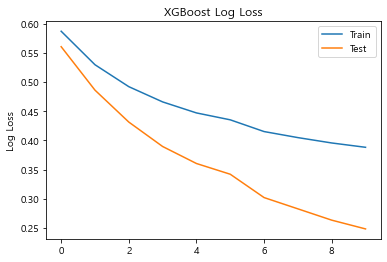

In [20]:
# 모델 성능 시각화

from matplotlib import pyplot
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
#pyplot.show()
plt.savefig('XGBoost Log Loss.png')

In [21]:
# evaluate xgboost model
print("------Evaluating xgboost model------")
# Predict
test_pred = xgb_clf.predict_proba(df_org_test)[:,1]
# Calculate auc
xgb_auc = roc_auc_score(org_test_y, test_pred)
print(xgb_auc)

------Evaluating xgboost model------


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [22]:
# 검사율에 따른 우범예측 함수 생성

def inspection_performance(predicted_fraud, test_fraud):
    
    # Set default values before a loop
    
    Inspect_Rate = []
    Precision=[]
    Recall=[]
    
    # Create a loop for making confusion matrix at each inspection rate

    for i in range(0,101,1):
        
        # Find the ith value in ascending order.
        threshold = np.percentile(predicted_fraud, i)
        # Precision = number of frauds / number of inspection
        precision = np.mean(test_fraud[predicted_fraud >= threshold])
        # Recall = number of inspected frauds / number of frauds
        recall = sum(test_fraud[predicted_fraud >= threshold])/sum(test_fraud)
        # Save values
        Inspect_Rate.append(100-i)
        Precision.append(precision)
        Recall.append(recall)
        
    
    compiled_conf_matrix = pd.DataFrame({
        
        'Inspect_Rate':Inspect_Rate,
        'Precision':Precision,
        'Recall':Recall
    })

    return compiled_conf_matrix

In [23]:
# 검사율에 따른 우범예측 
basic_performance = inspection_performance(test_pred, org_test_y.astype(float))
# 검사율 1~10% 지정 시 Precision 및 Recall 분석
# Precision (적중률) = (검사선별된 우범건수)/(검사선별 건수)
# Recall (적발률) = (검사선별된 우범건수) / (전체 우범건수)
basic_performance.iloc[range(99,89,-1),:]

,Inspect_Rate,Precision,Recall
99,1,1.0,0.010293
98,2,1.0,0.020079
97,3,1.0,0.030035
96,4,1.0,0.041002
95,5,1.0,0.055092
94,6,1.0,0.060238
93,7,1.0,0.070193
92,8,1.0,0.080148
91,9,1.0,0.090526
90,10,1.0,0.100734


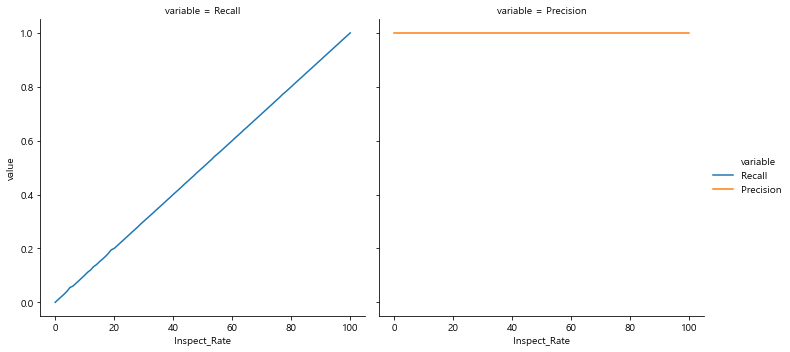

In [24]:
# 검사선별률에 따른 적중률 및 적발률 시각화
data = pd.melt(basic_performance, 
               id_vars = ['Inspect_Rate'],
               value_vars = ['Recall','Precision'])

sns.relplot(data=data,
            kind='line',
            x="Inspect_Rate", 
            y="value", 
            hue='variable',
            col="variable")
plt.savefig('recall & precision.png')


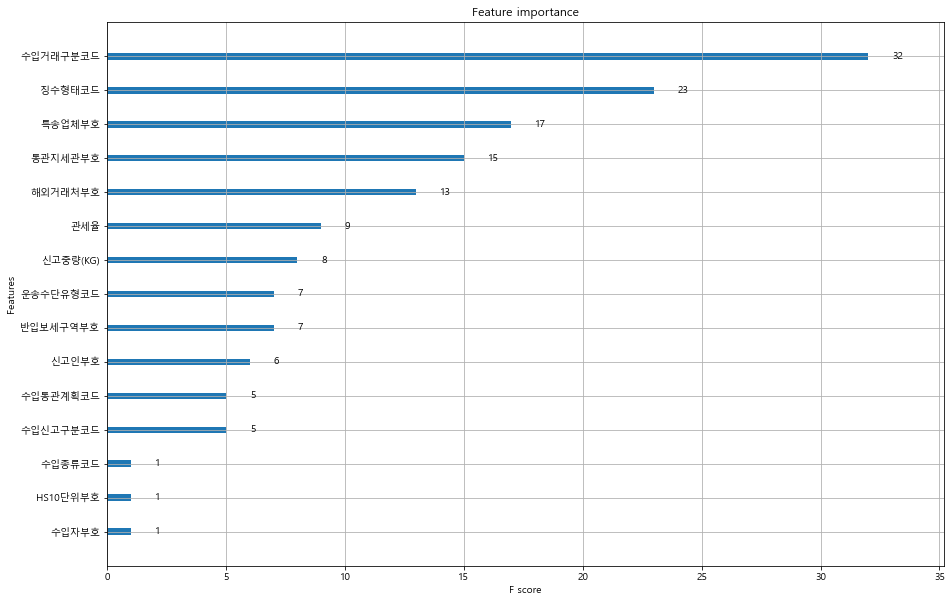

In [25]:
# 모델에 기여도가 높은 변수 시각화
from xgboost import plot_importance
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,10)
plot_importance(xgb_clf, max_num_features=30)
plt.show()